# Musical instruments prices
### A study of the prices of musical instruments in Sri Lanka

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("mako_r")

In [2]:
df = pd.read_csv("processed-data.csv", encoding="utf-8")

In [3]:
df.head(2)

,Unnamed: 0,Title,Sub_title,Price,Instrument_Type,Condition,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Is_new,Premium_seller,Price_value,Published
0,2486,yamaha psr2000 for sale,"Posted on 04 Sep 12:41 pm, Rambukkana, Kegalle","Rs 10,500",Keyboard / Piano,Used,"Rambukkana, Kegalle",all keyboards are not in working condition.goo...,https://ikman.lk/en/ad/yamaha-psr2000-for-sale...,migara,Member,2021-09-04 12:41:00,0,1,10500,2021-09-04 12:41:00
1,2072,yamaha psr e 463 for sale,"Posted on 13 Oct 1:11 pm, Wennappuwa, Puttalam","Rs 61,000",Keyboard / Piano,Used,"Wennappuwa, Puttalam",Brand new conditionUsb midi track playAudio re...,https://ikman.lk/en/ad/yamaha-psr-e-463-for-sa...,sajith,Member,2021-10-13 13:11:00,0,1,61000,2021-10-13 13:11:00


## Exploratory Analysis

**Instrument types**

In the dataset we have several categories for the musical instruments and accesories. Let's get some insights about this categories.

In [4]:
# Here we use pivot_table to group data around Intrument Type and condition, 
# and then whe use different aggregation functions to obtain some info about prices

table = df.pivot_table(values=["Title","Price_value"], index=['Instrument_Type'], columns=['Condition'], aggfunc={'Title': "count",
                             'Price_value': [np.mean, min, max]})

# This gives us a three level MultiIndex, let's lower it to two levels
new_index = [("Max Price", "New"),("Max Price", "Used"),("Mean Price", "New"),("Mean Price", "Used"),("Min Price", "New"),("Min Price", "Used"),("Items", "New"),("Items","Used")]
table.columns = pd.MultiIndex.from_tuples(new_index, names=["","Condition"])

# Now we are going to add a couple of columns to Items: we want the total number of items
# and the proportion of new ones within each instrument type

def getPercent(x,y):
    return(100*x/(x+y))

table["Items","Total"] = table.apply(lambda row: row["Items","New"] + row["Items","Used"], axis=1)
table["Items","% of New"] = table.apply(lambda row: getPercent(row["Items","New"],row["Items","Used"]), axis=1)


# Finally, we see the table, ordered by the most popular items first 
table.round(decimals=2).sort_values([('Items', 'Total')], ascending=False)

Max Price            Mean Price            \
Condition                            New       Used        New      Used   
Instrument_Type                                                            
Studio / Live Music Equipment  1500000.0  6850000.0   41182.62  80378.00   
String Instrument / Amplifier   348000.0   580000.0   20756.32  30796.64   
Keyboard / Piano                800000.0   770000.0   63473.01  75736.51   
Percussion / drums              230000.0   435000.0   26100.42  52425.89   
Other Instrument                100000.0  1025000.0    7968.67  64848.89   
Woodwind / brass                165000.0    95000.0   44968.18  37831.43   
Vinyl                            13500.0    95000.0    7180.00  12584.62   
Sheet Music                      14000.0   150000.0    3691.50  30972.73   

                              Min Price         Items                         
Condition                           New    Used   New  Used   Total % of New  
Instrument_Type                                                               
Studio / Live Music Equipment     275.0   500.0   714  1058  1772.0    40.29  
String Instrument / Amplifier      80.0  1000.0   522  1212  1734.0    30.10  
Keyboard / Piano                  350.0  1500.0    98   557   655.0    14.96  
Percussion / drums                450.0   750.0   239   363   602.0    39.70  
Other Instrument                  350.0  1000.0    82    90   172.0    47.67  
Woodwind / brass                  250.0   500.0    11    70    81.0    13.58  
Vinyl                            1000.0   500.0     5    39    44.0    11.36  
Sheet Music                      1000.0  1500.0    26    11    37.0    70.27

In the previous table we have a good summary of the main characteristics asociated with each instrument type, such as price ranges, proportion of new products vs used ones and the numer of items listed in each category.<br><br>
Let's plot this data to get a more clear insight about the different categories.

Text(0, 0.5, 'Number of items listed')

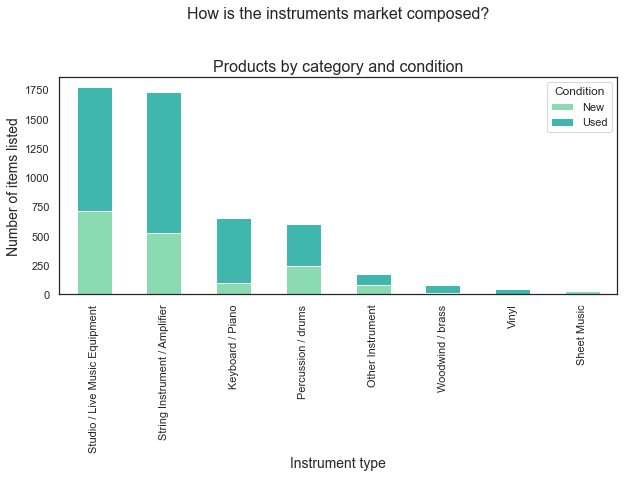

In [5]:
# We are going to make a stacked bar plot to see wich are the most popular categories
# and also the proportion of new and used items in each instrument type.

fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)

table["Items"].sort_values(["Total"], ascending=False).drop(["Total","% of New"], axis=1).plot(kind='bar', stacked=True, ax=ax)
#add overall title
plt.title("How is the instruments market composed?\n\n\nProducts by category and condition", fontsize=16)

#add axis titles
plt.xlabel('Instrument type', fontsize=14)
plt.ylabel('Number of items listed', fontsize=14)


From this bar chart we can get a broad picture of how the musical instruments market of Sri Lanka is composed (based on this sample). We can see that the most popular items are in the Studio/Live Equipment category, followed closely by String Instruments. We can appreciate also that there are more used items than new ones in almost all instrument types, the only exception being Sheet Music. 